<a href="https://colab.research.google.com/github/breenl/roboinvestidor/blob/main/Fase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
from sklearn.linear_model import LinearRegression
import yfinance as yf
import matplotlib.pyplot as pyplot
from GoogleNews import GoogleNews
import nltk
from newspaper import Article
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
import zipfile
#import timedelta
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#pip install GoogleNews
#pip install timedelta
#pip install newspaper3k
#pip install yfinance

In [ ]:
#Consultar preco por acao em um periodo
def pega_cotacoes(tickers,inicio,fim):
    return  yf.download(
            tickers = tickers,
            start=inicio, end=fim,
            #interval = "1mo",
            group_by = 'ticker',
    )

[*********************100%***********************]  1 of 1 completed


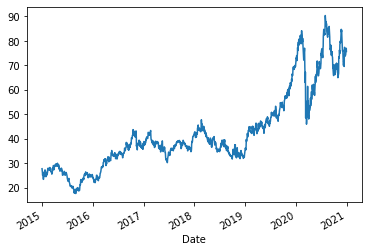

In [ ]:
papel = "CSAN3.sa"
empresa = "cosan,açucar,cana de açucar"
inicio = "2015-01-01"
fim = "2020-12-31"
inicioNews = '01/01/2015'
fimNews = '12/31/2020'
ticker =pega_cotacoes(papel,inicio,fim)

ticker["Close"].plot()


In [ ]:
googlenews = GoogleNews()

googlenews.set_lang('pt')
#googlenews.set_period('7d')
googlenews.set_time_range(inicioNews,fimNews)
googlenews.set_encode('utf-8')


googlenews.search(empresa)

# lista de stopword
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')#set(STOPWORDS)


#Le as noticias e extrai automaticamente os textos
textos = []
forcaTexto = []
notas = []
datas = []
links = []
analyzer = SentimentIntensityAnalyzer()

try:
  for url in googlenews.get_links():
    article = Article(url)
    
    article.download() #Downloads the link’s HTML content
    article.parse() #Parse the article
    nltk.download('punkt')#1 time download of the sentence tokenizer
    article.nlp()#  Keyword extraction wrapper
    textos.append(article.summary)
    notas.append(analyzer.polarity_scores(article.summary)['compound'])
    forcaTexto.append(article.summary)   
    links.append(url)
    #datas.append(pd.to_datetime(article.publish_date, format='%d/%m/%y'))
    if(len(str(article.publish_date)) > 5): 
      dataFormatada = str(article.publish_date)[:10]
      print(dataFormatada)
      datas.append(datetime.strptime(str(dataFormatada), '%Y-%m-%d'))#.strftime('%Y-%m-%d'))
    # print(article.text)
    #print(article.title)
    # print(article.canonical_link)
    #print(article.summary)    
    #break
except Exception as e:
  print (str(e))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2020-03-18
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2020-04-30
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2020-03-09
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]

In [ ]:
precos = []
for close in ticker["Close"]:
  precos.append(close)


resultado = list(zip(notas, forcaTexto,datas,links))

paraNuvem = pd.DataFrame(resultado,columns=[["notas","textos","datas","links"]])


#paraNuvem.plot()
#ticker["Close"]

# Plot the responses for different events and regions
#sns.lineplot(data=precos)
#sns.lineplot(data=notas)



cotacao = []
for j in datas:
  dat = datetime.strptime(str(j), '%Y-%m-%d %H:%M:%S')   
  retorno = pega_cotacoes(papel,j,dat + timedelta(days=1))["Close"] #3 para casos de noticias na segunda
  print(retorno)
  if(retorno.size > 0):
    cotacao.append(retorno[0])
  else:
    cotacao.append(0)

paraNuvem["fechamentos"] = cotacao


[*********************100%***********************]  1 of 1 completed
Date
2020-03-18    46.0
Name: Close, dtype: float64
[*********************100%***********************]  1 of 1 completed
Date
2020-04-30    60.34
Name: Close, dtype: float64
[*********************100%***********************]  1 of 1 completed
Date
2020-03-09    63.0
Name: Close, dtype: float64
[*********************100%***********************]  1 of 1 completed
Date
2020-03-30    55.580002
Name: Close, dtype: float64


In [ ]:
paraNuvem.to_csv("teste.csv")

paraNuvem

,notas,textos,datas,links,fechamentos
0,0.0000,Usinas de cana-de-açúcar vão doar álcool para ...,2020-03-18,https://g1.globo.com/economia/agronegocios/not...,46.000000
1,-0.2500,Foi a saída que as duas companhias encontraram...,2020-04-30,https://economia.estadao.com.br/noticias/geral...,60.340000
2,0.0000,A Raízen Energia estima investir R$ 3 bilhões ...,2020-03-09,https://jornalcana.com.br/raizen-estimar-inves...,63.000000
3,-0.6808,A afirmação é do presidente-executivo da Raíze...,2020-03-30,https://www.moneytimes.com.br/raizen-ve-mix-de...,55.580002


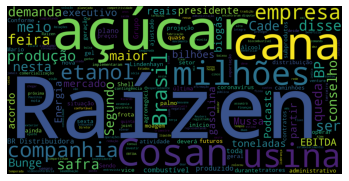

In [ ]:
tudo = " ".join(s for s in textos)

wordcloud2 = WordCloud(stopwords=stopwords,background_color="black",
                      width=1600, height=800).generate(tudo)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

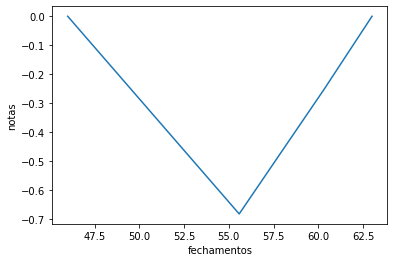

In [ ]:
teste = pd.read_csv("teste.csv")


#teste["fechamentos"].plot()
#teste["notas"].plot()
#teste.plot(x="datas",y="notas")
#teste.plot(x="datas",y="fechamentos")
sns.lineplot(data=teste, x="fechamentos", y="notas")



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.


,ds,yhat,yhat_lower,yhat_upper
364,2021-04-26,83.764937,75.634561,91.936753
365,2021-04-27,83.835100,75.399807,91.503730
366,2021-04-28,83.905263,75.506277,91.453802
367,2021-04-29,83.975426,75.828272,91.543619
368,2021-04-30,84.045590,75.577545,91.780693


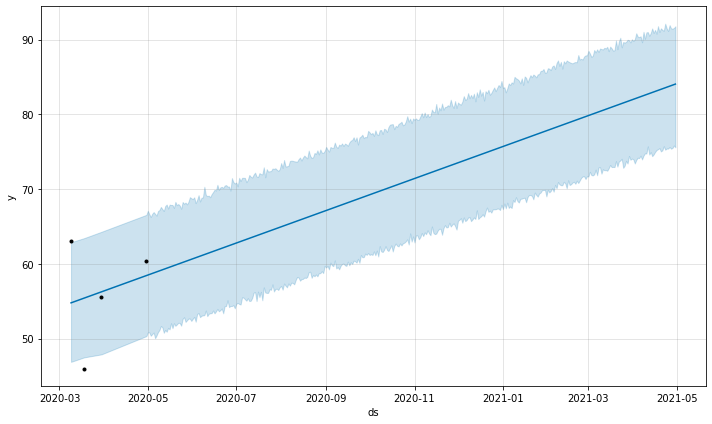

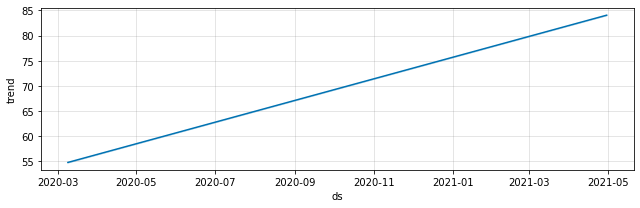

In [ ]:
#Previsões com base em data e preços usando o profeta do Facebook
from fbprophet import Prophet
x = teste[["datas","fechamentos"]].copy()
x.rename({'datas': 'ds', 'fechamentos': 'y'}, axis=1, inplace=True)

# profeta = pd.DataFrame(x,columns=[["ds","y"]])


m = Prophet()
m.fit(x)

future = m.make_future_dataframe(periods=365)
future.tail()

forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
# Python
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
plot_components_plotly(m, forecast)